In [1]:
#Importing necessary libraries

import json
import pandas as pd
from pandas import DataFrame, Series
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Loading placement data json file

with open('placement.json') as f:
  data = json.load(f)

In [3]:
#For viewing the json data file

print(data)

[{'sl_no': 1, 'gender': 'M', 'ssc_p': 67, 'ssc_b': 'Others', 'hsc_p': 91, 'hsc_b': 'Others', 'hsc_s': 'Commerce', 'degree_p': 58, 'degree_t': 'Sci&Tech', 'workex': 'No', 'etest_p': 55, 'specialisation': 'Mkt&HR', 'mba_p': 58.8, 'status': 'Placed', 'salary': 270000}, {'sl_no': 2, 'gender': 'M', 'ssc_p': 79.33, 'ssc_b': 'Central', 'hsc_p': 78.33, 'hsc_b': 'Others', 'hsc_s': 'Science', 'degree_p': 77.48, 'degree_t': 'Sci&Tech', 'workex': 'Yes', 'etest_p': 86.5, 'specialisation': 'Mkt&Fin', 'mba_p': 66.28, 'status': 'Placed', 'salary': 200000}, {'sl_no': 3, 'gender': 'M', 'ssc_p': 65, 'ssc_b': 'Central', 'hsc_p': 68, 'hsc_b': 'Central', 'hsc_s': 'Arts', 'degree_p': 64, 'degree_t': 'Comm&Mgmt', 'workex': 'No', 'etest_p': 75, 'specialisation': 'Mkt&Fin', 'mba_p': 57.8, 'status': 'Placed', 'salary': 250000}, {'sl_no': 4, 'gender': 'M', 'ssc_p': 56, 'ssc_b': 'Central', 'hsc_p': 52, 'hsc_b': 'Central', 'hsc_s': 'Science', 'degree_p': 52, 'degree_t': 'Sci&Tech', 'workex': 'No', 'etest_p': 66, 's

In [4]:
#Converting json data to pandas dataframe using pd.DataFrame
#Naming the pandas dataframe as df

df = pd.DataFrame(data)

In [5]:
#Viewing pandas data 

df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [6]:
#Checking if the data has any null values
df.isnull().sum()

#The data doesn't have any null values.

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
#Deleting sl_no column as it isn't significant for our analysis

del df['sl_no']

In [8]:
#Renaming all the columns in the placement dataset

df = df.rename(columns = {"gender":"Gender", "ssc_p":"SSCPercent", "ssc_b":"SSCBoard", "hsc_p":"HSCPercent", 
                          "hsc_b":"HSCBoard", "hsc_s":"HSCStream", "degree_p":"DegreePercent", 
                          "degree_t":"DegreeStream", "workex":"Workex", "etest_p":"TestPercent", 
                          "specialisation":"Specialisation", "mba_p":"MBAPercent", "status":"Status", 
                          "salary":"Salary"})

In [9]:
#Viewing the cleaned data set

df

,Gender,SSCPercent,SSCBoard,HSCPercent,HSCBoard,HSCStream,DegreePercent,DegreeStream,Workex,TestPercent,Specialisation,MBAPercent,Status,Salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [10]:
#To check the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
Gender            215 non-null object
SSCPercent        215 non-null float64
SSCBoard          215 non-null object
HSCPercent        215 non-null float64
HSCBoard          215 non-null object
HSCStream         215 non-null object
DegreePercent     215 non-null float64
DegreeStream      215 non-null object
Workex            215 non-null object
TestPercent       215 non-null float64
Specialisation    215 non-null object
MBAPercent        215 non-null float64
Status            215 non-null object
Salary            215 non-null int64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [11]:
#Describing the numerical attributes of the data set
#describe() function gives us the mean, std, min, max, etc for all the numerical attributes of the data set

df.describe()

,SSCPercent,HSCPercent,DegreePercent,TestPercent,MBAPercent,Salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
#To check the Range of each numerical column

#SSC Percent
SSCRange = max(df.SSCPercent) - min(df.SSCPercent)
print('SSC Percent Range : ' + str(SSCRange))

#HSC Percent
HSCRange = max(df.HSCPercent) - min(df.HSCPercent)
print('HSC Percent Range : ' + str(HSCRange))

#Degree Percent Range
DegreeRange = max(df.DegreePercent) - min(df.DegreePercent)
print('Degree Percent Range : ' + str(DegreeRange))

#Test Percent Range
TestRange = max(df.TestPercent) - min(df.TestPercent)
print('Test Percent Range : ' + str(TestRange))

#MBA Percent Range
MBARange = max(df.MBAPercent) - min(df.MBAPercent)
print('MBA Percent Range : ' + str(MBARange))

#Salary Range
SalaryRange = max(df.Salary) - min(df.Salary)
print('Salary Percent Range : ' + str(SalaryRange))

SSC Percent Range : 48.510000000000005
HSC Percent Range : 60.7
Degree Percent Range : 41.0
Test Percent Range : 48.0
MBA Percent Range : 26.68
Salary Percent Range : 940000


In [13]:
#Shows the different types of units of each column

#SSC Board
print(df.SSCBoard.unique())

#HSC Board
print(df.HSCBoard.unique())

#HSC Stream
print(df.HSCStream.unique())

#Degree Stream
print(df.DegreeStream.unique())

#Work Experience
print(df.Workex.unique())

#Specialisation
print(df.Specialisation.unique())

#Status - Employed or not
print(df.Status.unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


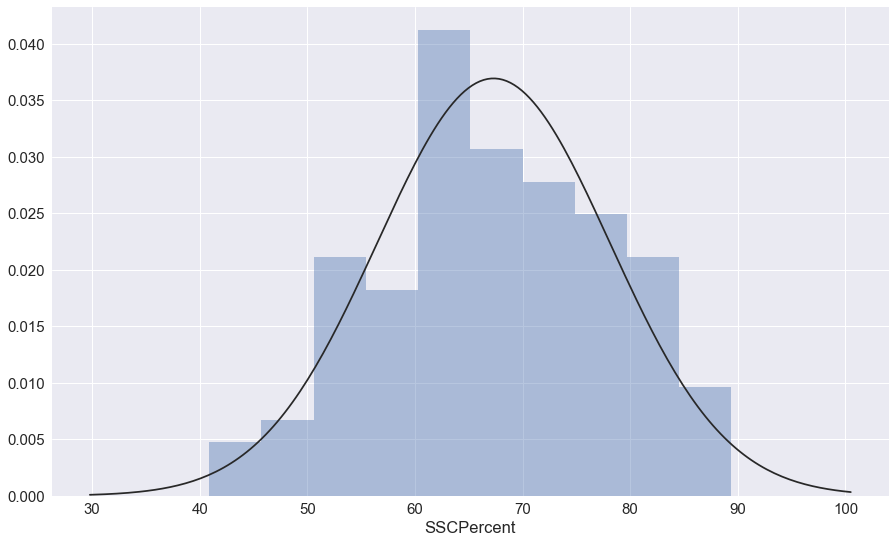

In [14]:
#The graph shows us the Distribution of SSC Marks

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.SSCPercent, kde = False, fit = norm)

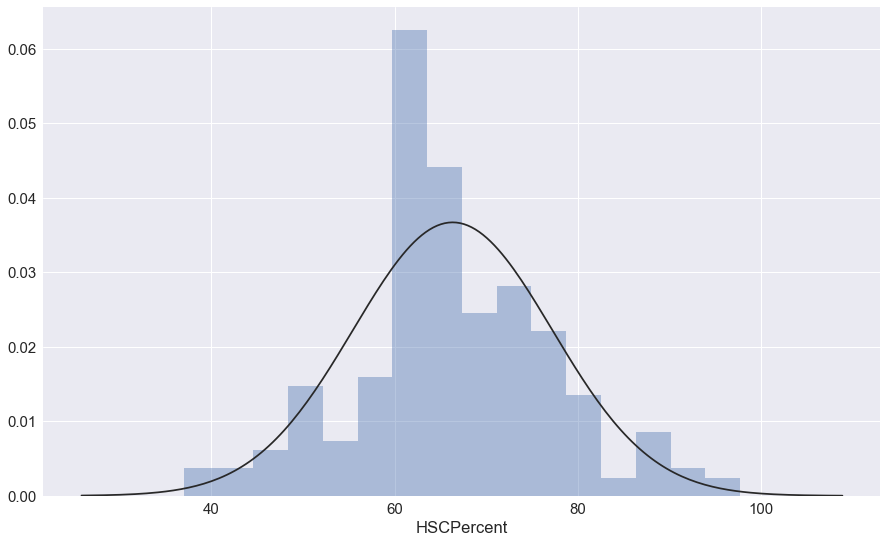

In [15]:
#The graph shows us the Distribution of HSC Marks

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.HSCPercent, kde = False, fit = norm)

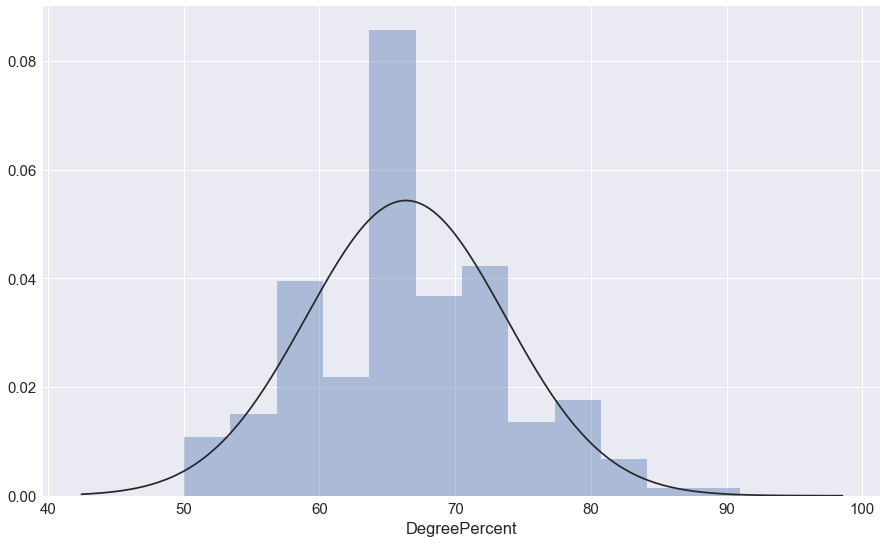

In [16]:
#The graph shows us the Distribution of Degree Marks

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.DegreePercent, kde = False, fit = norm)

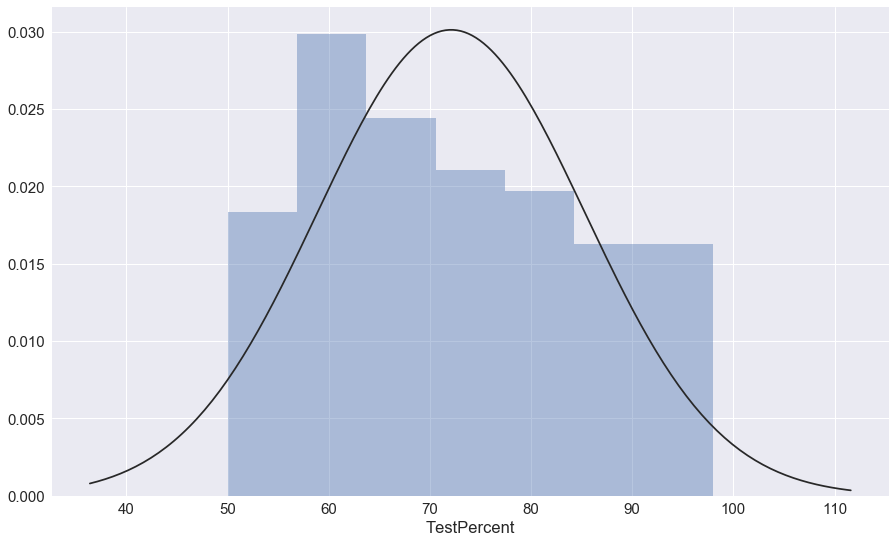

In [17]:
#The graph shows us the Distribution of Test Marks

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.TestPercent, kde = False, fit = norm)

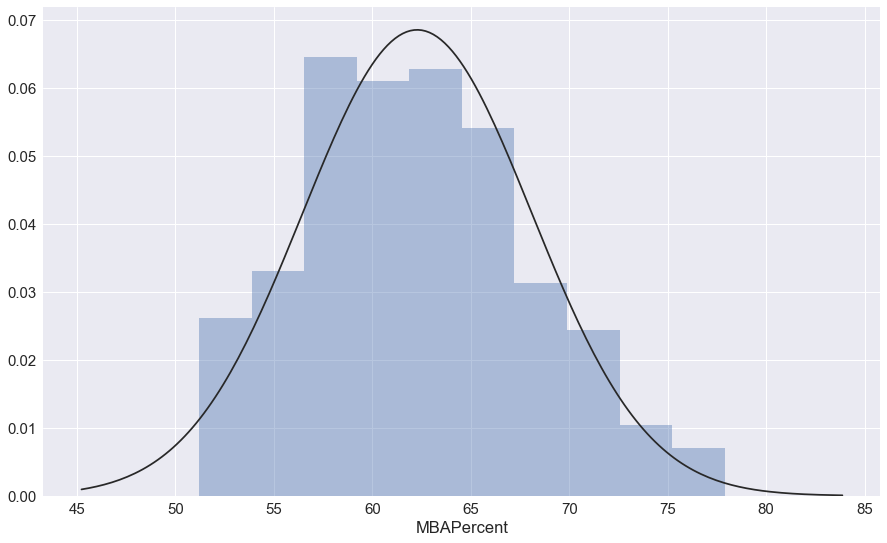

In [18]:
#The graph shows us the Distribution of MBA Marks

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.MBAPercent, kde = False, fit = norm)

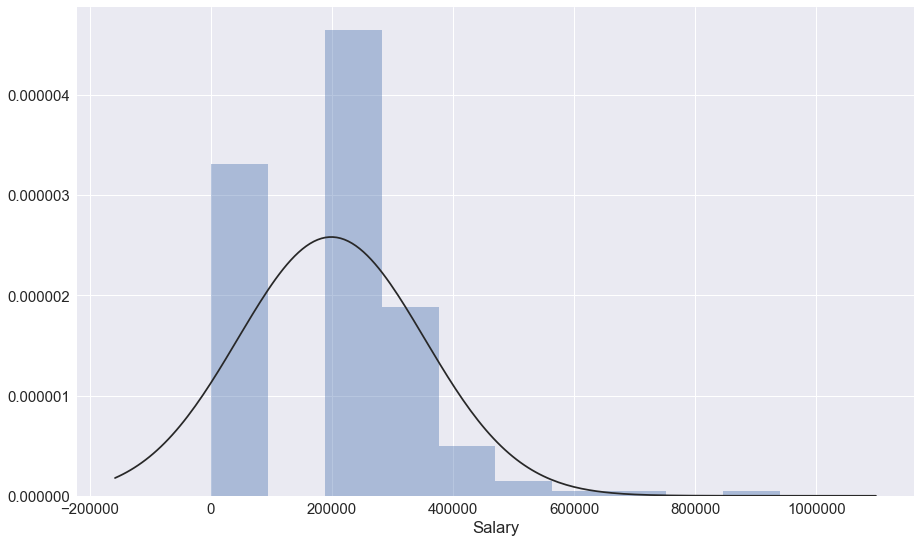

In [19]:
#The graph shows us the Distribution of Salary

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.Salary, kde = False, fit = norm)

In [20]:
#Grouping data by Gender and comparing data gender wise

A = df.groupby('Gender')
A = A.describe().T
A.to_csv('Group_by_Gender.csv')
A

Gender                           F              M
SSCPercent    count      76.000000     139.000000
              mean       68.310921      66.752518
              std        11.522542      10.429150
              min        40.890000      41.000000
              25%        62.500000      60.200000
              50%        69.750000      65.000000
              75%        77.000000      74.000000
              max        88.000000      89.400000
HSCPercent    count      76.000000     139.000000
              mean       66.646842      66.161655
              std        11.021048      10.865579
              min        37.000000      39.000000
              25%        60.000000      61.000000
              50%        64.600000      65.000000
              75%        73.000000      73.000000
              max        97.000000      97.700000
DegreePercent count      76.000000     139.000000
              mean       68.090000      65.429856
              std         8.128285       6.748840
              min        50.200000      50.000000
              25%        64.000000      60.450000
              50%        67.700000      65.000000
              75%        73.000000      70.100000
              max        91.000000      83.000000
TestPercent   count      76.000000     139.000000
              mean       70.590658      72.926115
              std        13.343943      13.213727
              min        50.000000      50.000000
              25%        58.765000      61.140000
              50%        69.000000      72.000000
              75%        80.000000      84.135000
              max        98.000000      97.400000
MBAPercent    count      76.000000     139.000000
              mean       64.643553      60.984892
              std         5.242545       5.750263
              min        53.290000      51.210000
              25%        60.710000      56.875000
              50%        64.805000      60.440000
              75%        68.675000      64.245000
              max        76.180000      77.890000
Salary        count      76.000000     139.000000
              mean   168815.789474  215043.165468
              std    143040.666528  158965.854984
              min         0.000000       0.000000
              25%         0.000000       0.000000
              50%    216000.000000  250000.000000
              75%    250500.000000  300000.000000
              max    650000.000000  940000.000000

In [21]:
#Grouping data by HSC Stream and arranging data by Salary (Highest to Lowest)

B = df.groupby('HSCStream').mean()
B = B.sort_values(["Salary"], ascending = False)
B.to_csv('Group_by_HSCStream.csv')
B

,SSCPercent,HSCPercent,DegreePercent,TestPercent,MBAPercent,Salary
HSCStream,,,,,,
Science,69.697253,63.456374,67.158681,72.956374,62.604615,203549.450549
Commerce,66.263540,68.999115,66.211681,71.827080,62.004956,200938.053097
Arts,58.181818,62.745455,61.475455,67.830000,62.384545,135636.363636


In [22]:
#Grouping data by Degree Stream and arranging data by Salary (Highest to Lowest)

C = df.groupby('DegreeStream').mean()
C = C.sort_values(["Salary"], ascending = False)
C.to_csv('Group_by_Degree.csv')
C

,SSCPercent,HSCPercent,DegreePercent,TestPercent,MBAPercent,Salary
DegreeStream,,,,,,
Sci&Tech,71.189322,65.385593,67.844237,72.310508,63.461186,218627.118644
Comm&Mgmt,65.955586,67.185379,66.203103,71.985241,61.865379,196000.000000
Others,64.227273,60.181818,60.666364,72.494545,61.374545,127454.545455


In [23]:
#Grouping data by work experience to know the mean salary of each group
#Arranging data by salary (Highest to Lowest)

D = df.groupby('Workex', as_index=False)["Salary"].mean()
D = D.sort_values(["Salary"], ascending = False)
D.to_csv('By Workex.csv')
D

,Workex,Salary
1,Yes,262283.783784
0,No,165333.333333


In [24]:
#Grouping data by Specialisation to know the mean salary of each group
#Arranging data by salary (Highest to Lowest)

E = df.groupby('Specialisation', as_index=False)["Salary"].mean()
E = E.sort_values(["Salary"], ascending = False)
E.to_csv('By Specialisation.csv')
E

,Specialisation,Salary
0,Mkt&Fin,236591.666667
1,Mkt&HR,150842.105263


In [25]:
#Grouping data by Status to know the mean of other variables

F = df.groupby('Status').mean()
F.to_csv('Group_by_Status.csv')
F

,SSCPercent,HSCPercent,DegreePercent,TestPercent,MBAPercent,Salary
Status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,0.000000
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [26]:
#Changing Status column to 0 and 1 for the correlation plot

data1 = df
data1['Status'].values[data1['Status']=='Not Placed'] = 0 
data1['Status'].values[data1['Status']=='Placed'] = 1
data1.Status = data1.Status.astype('int')

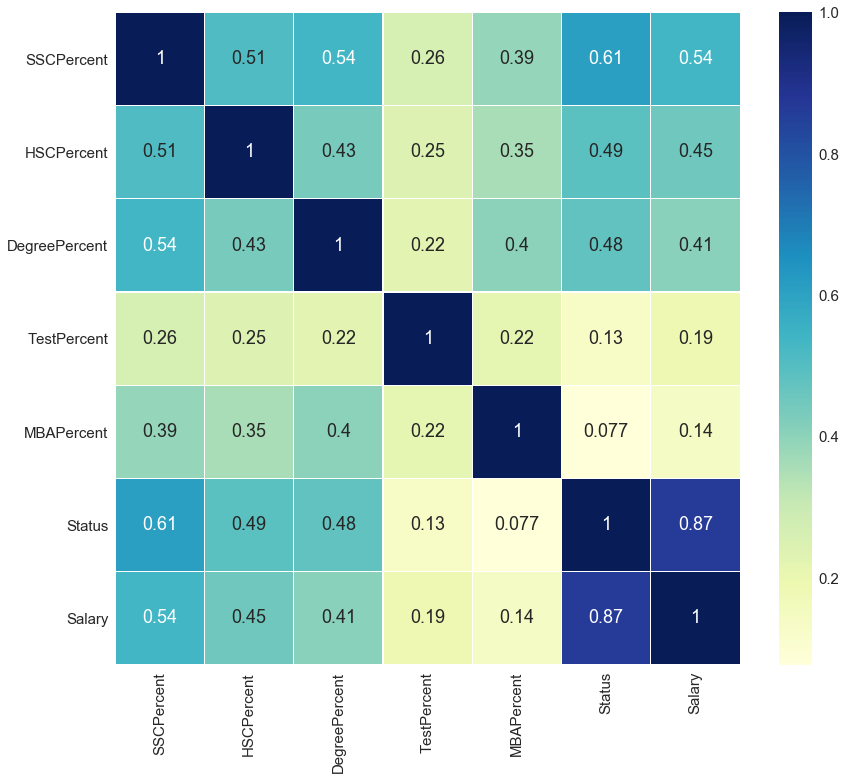

In [27]:
#Plotting correlation graph to see how Status and Salary is related to other variables

plt.figure(figsize=(14,12))
data2 = data1.loc[:,data1.columns != 'Id']
sns.heatmap(data2.corr(), linewidth=0.2, cmap="YlGnBu", annot=True)